Gaussian discriminant analysis con stessa matrice di covarianza per le distribuzioni delle due classi e conseguente separatore lineare.

In [6]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as st

Definizioni relative alla visualizzazione

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

Leggiamo i dati da un file csv in un dataframe pandas. I dati hanno 3 valori: i primi due corrispondono alle features e sono assegnati alle colonne x1 e x2 del dataframe; il terzo è il valore target, assegnato alla colonna t. Vengono poi creati una matrice X delle features e un vettore target t

In [9]:
# legge i dati in dataframe pandas
data = pd.read_csv("../dataset/ex2data1.txt", header=0, delimiter=',', names=['x1','x2','t'])

# calcola dimensione dei dati
n = len(data)
n0 = len(data[data.t==0])

# calcola dimensionalità delle features
nfeatures = len(data.columns)-1

X = np.array(data[['x1','x2']])
t = np.array(data['t'])

Visualizza il dataset.

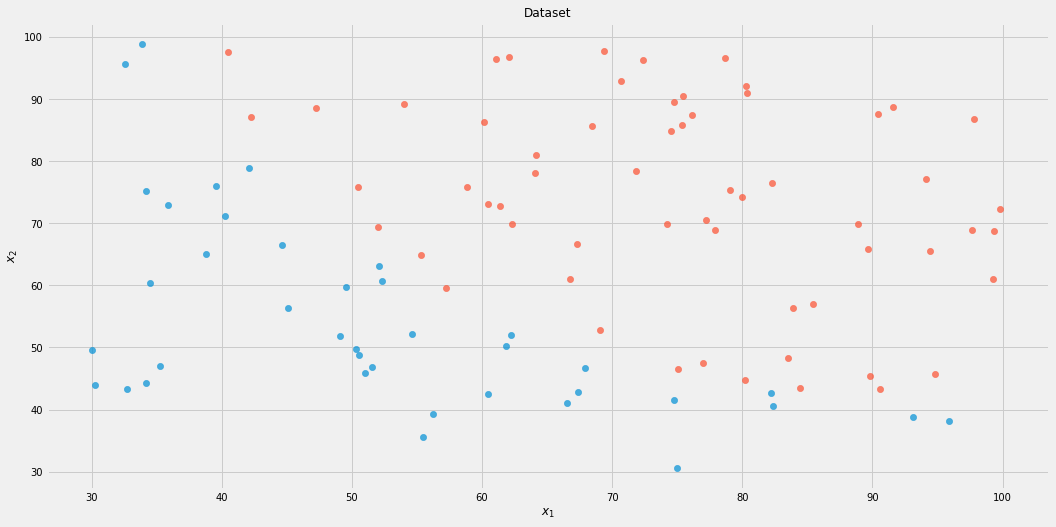

In [10]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, color=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40,c=colors[1], alpha=.7)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Dataset', fontsize=12)
plt.show()

Calcola le medie delle due distribuzioni.

In [12]:
mu0=np.array(np.mean(data[data.t==0][['x1','x2']]))
mu1=np.array(np.mean(data[data.t==1][['x1','x2']]))

Consideriamo una matrice di covarianza uguale per le distribuzioni delle due classi. La stimiamo pari alla matrice di covarianza dell'intero dataset. Calcoliamo anche la sua inversa, che appare nella definizione delle distribuzioni gaussiane.

In [13]:
sigma=np.cov(X.T)

Stimiamo la probabilità a priori della classe C0 come rapporto tra il numero di elementi del dataset appartenenti alla classe e la dimensione totale del dataset

In [15]:
prior=float(n0)/n

Deriviamo il vettore theta dei tre coefficienti dell'iperpiano di separazione tra le due classi, utilizzando la definizione analitica fornita dal modello.

In [16]:
# inversa della matrice di covarianza
sigmainv=np.matrix(sigma).I
# vettori colonna delle medie
m0=np.matrix(mu0).T
m1=np.matrix(mu1).T
# coefficienti associati alle due feature
theta=np.asarray(sigmainv *(m0-m1)).ravel()
# termine noto
theta0=-0.5*m0.T*sigmainv*m0+0.5*mu1.T*sigmainv*m1+np.log(prior)-np.log(1-prior)
# concatenazione del termine noto nel vettore dei coefficienti
theta = np.append(theta0[0,0], theta)
print("theta: [{0:5.3f}, {1:5.3f}, {2:5.3f}]".format(theta[0],theta[1],theta[2]))

theta: [7.140, -0.060, -0.058]


Definiamo la griglia 100x100 da utilizzare per la visualizzazione delle varie distribuzioni.

In [17]:
# insieme delle ascisse dei punti
u = np.linspace(min(X[:,0]), max(X[:,0]), 100)
# insieme delle ordinate dei punti
v = np.linspace(min(X[:,1]), max(X[:,1]), 100)
# deriva i punti della griglia: il punto in posizione i,j nella griglia ha ascissa U(i,j) e ordinata V(i,j)
U, V = np.meshgrid(u, v)

Calcola sui punti della griglia le probabilità delle classi $p(x|C_0), p(x|C_1)$ e le probabilità a posteriori delle classi $p(C_0|x), p(C_1|x)$

In [18]:
# funzioni che calcolano le probabilità secondo le distribuzioni delle due classi
vf0=np.vectorize(lambda x,y:st.multivariate_normal.pdf([x,y],mu0,sigma))
vf1=np.vectorize(lambda x,y:st.multivariate_normal.pdf([x,y],mu1,sigma))

# calcola le probabilità delle due distribuzioni sulla griglia
p0=vf0(U,V)
p1=vf1(U,V)

Visualizzazione della distribuzione di $p(x|C_0)$.

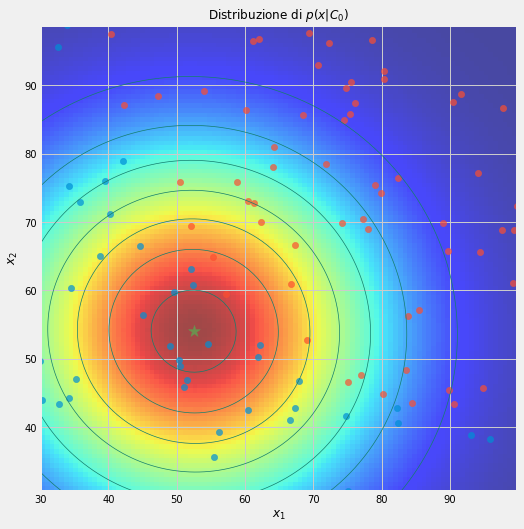

In [19]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
# inserisce una rappresentazione della probabilità della classe C0 sotto forma di heatmap
imshow_handle = plt.imshow(p0, origin='lower', extent=(min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])), alpha=.7)
plt.contour(U, V, p0, linewidths=[.7], colors=[colors[6]])
# rappresenta i punti del dataset
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, c=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40,c=colors[1], alpha=.7)
# rappresenta la media della distribuzione
ax.scatter(mu0[0], mu0[1], s=150,c=colors[3], marker='*', alpha=1)
# inserisce titoli, etc.
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title('Distribuzione di $p(x|C_0)$', fontsize=12)
plt.show()

Visualizzazione della distribuzione di $p(x|C_1)$.

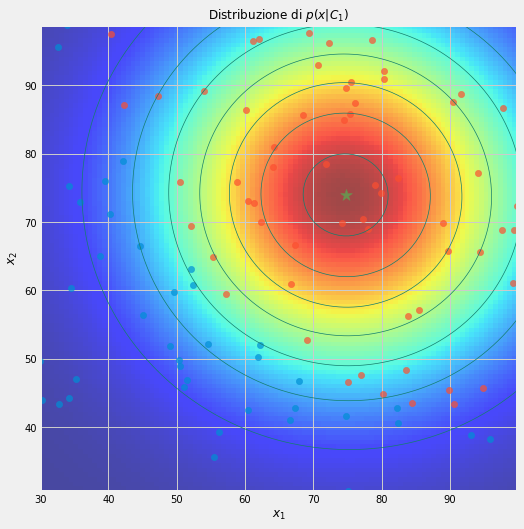

In [20]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
# inserisce una rappresentazione della probabilità della classe C0 sotto forma di heatmap
imshow_handle = plt.imshow(p1, origin='lower', extent=(min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])), alpha=.7)
plt.contour(U, V, p1, linewidths=[.7], colors=[colors[6]])
# rappresenta i punti del dataset
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, c=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40,c=colors[1], alpha=.7)
# rappresenta la media della distribuzione
ax.scatter(mu1[0], mu1[1], s=150,c=colors[3], marker='*', alpha=1)
# inserisce titoli, etc.
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title('Distribuzione di $p(x|C_1)$', fontsize=12)
plt.show()

Calcoliamo ora la distribuzione a posteriori delle classi $C_0$ e $C_1$ per tutti i punti della griglia, applicando la regola di Bayes

In [21]:
# calcola il rapporto tra le likelihood delle classi per tutti i punti della griglia
z=p0/p1   

# calcola il rapporto tra le probabilità a posteriori delle classi per tutti i punti della griglia
zbayes=p0*prior/(p1*(1-prior)) 

# calcola evidenza
ev = p0*prior+p1*(1-prior)

# calcola le probabilità a posteriori di C0 e di C1
pp0 = p0*prior/ev
pp1 = p1*(1-prior)/ev

Visualizzazione di $p(C_0|x)$

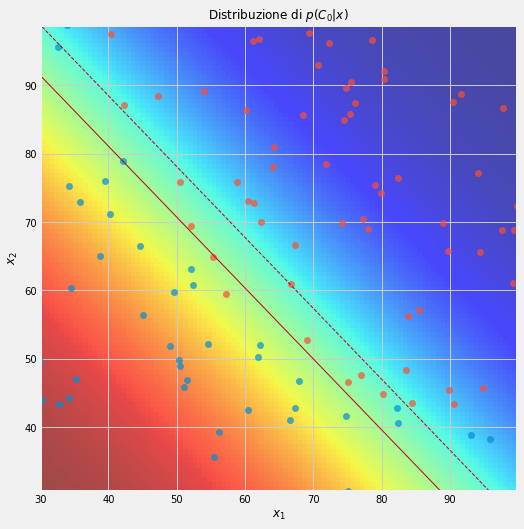

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
imshow_handle = plt.imshow(pp0, origin='lower', extent=(min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])), alpha=.7)
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, c=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40,c=colors[1], alpha=.7)
plt.contour(U, V, zbayes, [1.0], colors=[colors[7]],linewidths=[1])
plt.contour(U, V, z, [1.0], colors=[colors[7]],linewidths=[1], linestyles='dashed')
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title("Distribuzione di $p(C_0|x)$", fontsize=12)
plt.show()

Visualizzazione di $p(C_1|x)$

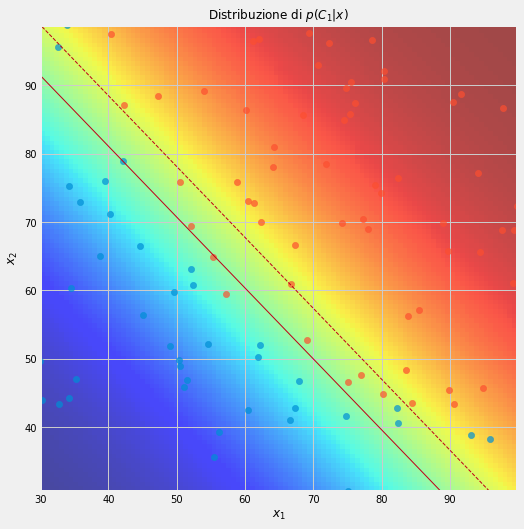

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
imshow_handle = plt.imshow(pp1, origin='lower', extent=(min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])), alpha=.7)
ax.scatter(data[data.t==0].x1, data[data.t==0].x2, s=40, c=colors[0], alpha=.7)
ax.scatter(data[data.t==1].x1, data[data.t==1].x2, s=40,c=colors[1], alpha=.7)
plt.contour(U, V, zbayes, [1.0], colors=[colors[7]],linewidths=[1])
plt.contour(U, V, z, [1.0], colors=[colors[7]],linewidths=[1], linestyles='dashed')
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(u.min(), u.max())
plt.ylim(v.min(), v.max())
plt.title("Distribuzione di $p(C_1|x)$", fontsize=12)
plt.show()

Effettua predizioni sugli elementi del dataset.

In [27]:
# probabilità degli elementi rispetto alla distribuzione di C0
p0_d = vf0(X[:,0],X[:,1])
# probabilità degli elementi rispetto alla distribuzione di C1
p1_d = vf1(X[:,0],X[:,1])
# rapporto tra le probabilità di appartenenza a C0 e C1 
z_d = p0_d*prior/(p1_d*(1-prior)) 

In [28]:
# predizioni del modello
pred = np.where(z_d<1, 1, 0)
# numero di elementi mal classificati
nmc = abs(pred-t).sum()
# accuracy
acc = 1-float(nmc)/n

In [29]:
print("Accuracy: {0:5.3f}".format(acc))

Accuracy: 0.919
